In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = 'data/'
sz=224

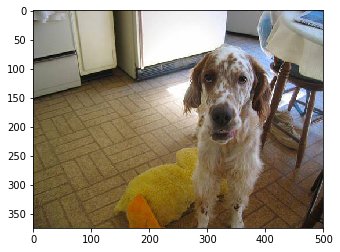

In [5]:
img = plt.imread(glob(f'{PATH}train/*.*')[1])
plt.imshow(img);

In [6]:
arch=resnet34

In [7]:
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms_from_model(arch, sz))

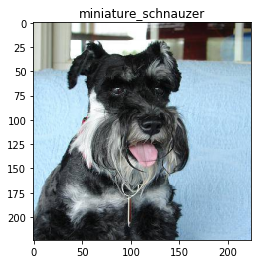

In [58]:
# plot random image in validation set and its label
im = random.randint(0,len(data.val_ds)-1)
plt.imshow(data.val_ds.denorm(data.val_ds[im][0])[0,:,:,:]);
plt.title(data.classes[data.val_y[im]]);

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      2.171882   1.103933   0.772994  
    1      1.114925   0.717871   0.826321                    
    2      0.81048    0.632945   0.834638                     



[array([0.63295]), 0.8346379645416648]

In [10]:
log_preds = learn.predict()
log_preds.shape

(2044, 120)

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
preds

array([ 19,  15,   7, ..., 109,   3,  28])

In [24]:
np.mean(preds==data.val_y)

0.8209393346379648

In [27]:
def rand_by_correct(is_correct): 
    mask = (preds == data.val_y) == is_correct
    return np.random.choice(np.where(mask)[0], 4, replace=False) 

In [20]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [46]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [59]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    labels = [data.classes[data.val_y[x]] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=labels, figsize=(16,8))

Correctly classified


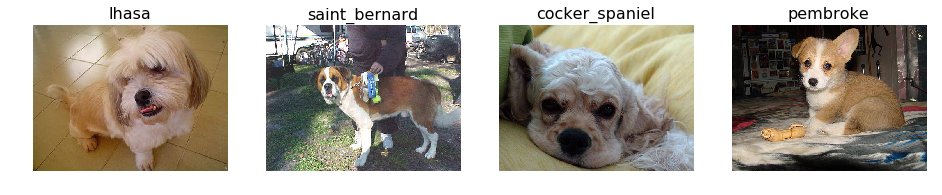

In [62]:
# a few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


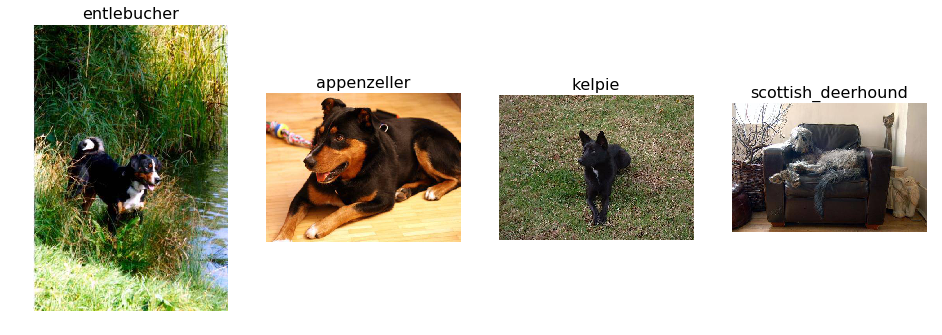

In [64]:
# a few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")